In [44]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow")
path_to_structure = os.path.join(path_to_results, "amiris_data_structure.xlsx")
path_to_output = os.path.join(path_to_results, "output","amiris_results.csv" )
path_to_storage_levels = os.path.join(path_to_results, "output","final_storage_levels.csv" )
path_to_generation = os.path.join(path_to_results, "output","hourly_generation_per_group.csv" )
generation_data =  pd.read_csv(path_to_generation, index_col="Unnamed: 0")
results_data = pd.read_csv(path_to_output) 
storage_levels_data = pd.read_csv(path_to_storage_levels) 
storages_data = pd.read_excel(path_to_structure, sheet_name='storages', index_col=0)
conventionals_data = pd.read_excel(path_to_structure, sheet_name='conventionals', index_col=0)
biogas_data = pd.read_excel(path_to_structure, sheet_name='biogas', index_col=0)

In [37]:
results_data.head()

,identifier,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,20060200048,2.263105e+05,1.016991e+07,8.413028e+03,9.943595e+06
1,20202600062,7.653493e+05,4.933411e+07,3.663382e+03,4.856876e+07
2,20202600063,7.653493e+05,4.933411e+07,3.663382e+03,4.856876e+07
3,20061200025,0.000000e+00,8.956200e+07,8.453120e+04,8.956200e+07
4,20062400045,2.978534e+06,9.134689e+08,2.206321e+06,9.104904e+08


In [31]:
conventionals_join = pd.merge(conventionals_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
# withbatteries = pd.merge(conventionals_join, 
#                       storage_levels_data, 
#                       on ='Unnamed: 0', 
#                       how ='inner')

In [32]:
conventionals_join.head()

,identifier,FuelType,OpexVarInEURperMWH,BlockSizeInMW,InstalledPowerInMW,Efficiency,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,20071400026,NUCLEAR,8.470588,484,484,0.38,3.171008e+07,4.490679e+09,3.743551e+06,4.458969e+09
1,20160300054,NATURAL_GAS,45.808460,420,420,0.36,1.464700e+08,3.895472e+09,3.197445e+06,3.749002e+09
2,20130300065,NATURAL_GAS,45.808460,420,420,0.34,1.441621e+08,3.893164e+09,3.147063e+06,3.749002e+09
3,20100300068,NATURAL_GAS,45.808460,870,870,0.32,2.910468e+08,8.056837e+09,6.353560e+06,7.765790e+09
4,20110300067,NATURAL_GAS,45.951082,1295,1295,0.30,4.104207e+08,1.196852e+10,8.931687e+06,1.155810e+10


In [30]:
storage_levels_data.head()

,Unnamed: 0,value
0,20202600062,200.0
1,20202600063,200.0


<AxesSubplot:>

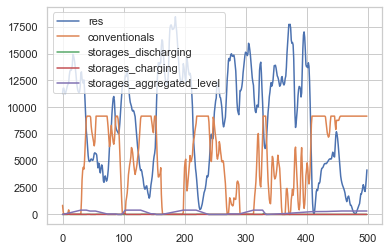

In [49]:
generation_data[0:500].plot()
